In [88]:
import pandas as pd

In [89]:
df=pd.read_csv('data.csv')

In [90]:
df.dtypes

id                             int64
having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [91]:
df.columns

Index(['id', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

[0.01386212 0.00942304 0.00598349 0.00573332 0.00444994 0.04799192
 0.05708419 0.31563401 0.01852256 0.00459264 0.0028144  0.00676585
 0.02245671 0.24719198 0.03999832 0.0205358  0.00627598 0.00522028
 0.00608127 0.00404471 0.00185787 0.0056142  0.00285251 0.01747182
 0.01262235 0.0689254  0.0130025  0.01303033 0.01996049]


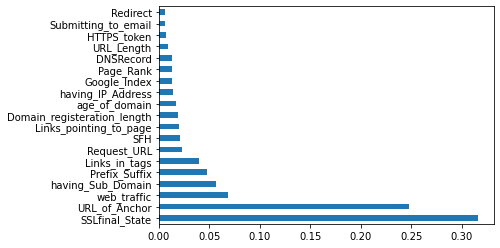

In [93]:
import numpy as np
X = df.iloc[:,1:30]  #independent columns
Y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()


In [94]:
df.drop('SSLfinal_State',
axis='columns', inplace=True)

In [95]:
df.drop('Abnormal_URL',
axis='columns', inplace=True)

In [96]:
df.drop('Redirect',
axis='columns', inplace=True)

In [97]:
df.drop('RightClick',
axis='columns', inplace=True)
df.drop('popUpWidnow',
axis='columns', inplace=True)
df.drop('port',
axis='columns', inplace=True)
df.drop('id',
axis='columns', inplace=True)
df.drop('DNSRecord',
axis='columns', inplace=True)
df.drop('web_traffic',
axis='columns', inplace=True)
df.drop('Page_Rank',
axis='columns', inplace=True)
df.drop('Google_Index',
axis='columns', inplace=True)
df.drop('Links_pointing_to_page',
axis='columns', inplace=True)
df.drop('Statistical_report',
axis='columns', inplace=True)

In [98]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'Domain_registeration_length', 'Favicon',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'on_mouseover', 'Iframe', 'age_of_domain',
       'Result'],
      dtype='object')

[0.0234658  0.0182295  0.01615745 0.01291266 0.01151009 0.08456415
 0.08961746 0.02723384 0.01474039 0.01360561 0.039121   0.47777255
 0.06748952 0.04710605 0.0136024  0.01096407 0.0080302  0.02387726]


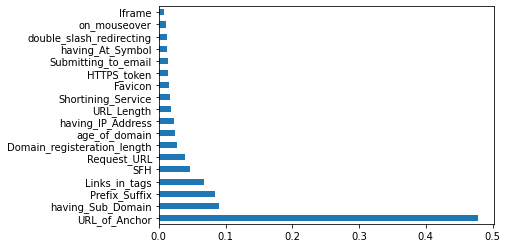

In [99]:
X = df.iloc[:,0:18]  #independent columns
Y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

In [132]:
class ELM(object):  
    
    def __init__(self, inputSize, outputSize, hiddenSize):
        """
        Initialize weight and bias between input layer and hidden layer
        Parameters:
        inputSize: int
            The number of input layer dimensions or features in the training data
        outputSize: int
            The number of output layer dimensions
        hiddenSize: int
            The number of hidden layer dimensions        
        """    

        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize       
        
        # Initialize random weight with range [-0.5, 0.5]
        self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))

        # Initialize random bias with range [0, 1]
        self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
        
        self.H = 0
        self.beta = 0

    def sigmoid(self, x):
        """
        Sigmoid activation function
        
        Parameters:
        x: array-like or matrix
            The value that the activation output will look for
        Returns:      
            The results of activation using sigmoid function
        """
        return 1 / (1 + np.exp(-1 * x))

    def predict(self, X):
        """
        Predict the results of the training process using test data
        Parameters:
        X: array-like or matrix
            Test data that will be used to determine output using ELM
        Returns:
            Predicted results or outputs from test data
        """
        X = np.matrix(X)
        y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta

        return y

    def train(self, X, y):
        """
        Extreme Learning Machine training process
        Parameters:
        X: array-like or matrix
            Training data that contains the value of each feature
        y: array-like or matrix
            Training data that contains the value of the target (class)
        Returns:
            The results of the training process   
        """
        X = np.matrix(X)
        y = np.matrix(y).reshape(-1,1) 
        # Calculate hidden layer output matrix (Hinit)
        self.H = (X * self.weight.T) + self.bias

        # Sigmoid activation function
        self.H = self.sigmoid(self.H)

        # Calculate the Moore-Penrose pseudoinverse matriks        
        H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T

        # Calculate the output weight matrix beta
        self.beta = H_moore_penrose * y

        return self.H * self.beta

In [113]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create random classification datasets with 1000 samples

# Create instance of ELM object with 10 hidden neuron
#df['Result']

In [109]:
#k=df['Result']
l=[]
for i in k:
    l.append(i)
df1=df
df1

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,on_mouseover,Iframe,age_of_domain
0,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,-1,1,-1,1,0,-1,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,1,-1,1,0,-1,-1,-1,1,1,1
3,1,0,1,1,1,-1,-1,1,1,-1,-1,0,0,-1,1,1,1,-1
4,1,0,-1,1,1,-1,1,-1,1,1,1,0,0,-1,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,-1,-1,1,1,1,1,-1,-1,-1,-1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,1,1,-1,-1,0,-1,-1,1,1
11052,1,-1,1,1,1,-1,1,-1,1,1,1,0,-1,-1,1,1,1,1
11053,-1,-1,1,1,1,-1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,1


In [103]:
df1.drop('Result',
axis='columns', inplace=True)

In [154]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create random classification datasets with 1000 samples

# Create instance of ELM object with 10 hidden neuron
elm = ELM(18, 1, 2597)

# Train test split 80:20
X_train, X_test, y_train, y_test = train_test_split(df1, l, test_size=0.99)

# Train data
elm.train(X_train,y_train)#.reshape(-1,1))

# Make prediction from training process
y_pred = elm.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.4025582457743262
